In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_prediction_dataset.csv', header=None)

C:\Users\Magnu\AppData\Local\Temp\ipykernel_16768\4281251351.py:5: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('diabetes_prediction_dataset.csv', header=None)


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8
0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,80.0,0,1,never,25.19,6.6,140,0
2,Female,54.0,0,0,No Info,27.32,6.6,80,0
3,Male,28.0,0,0,never,27.32,5.7,158,0
4,Female,36.0,0,0,current,23.45,5.0,155,0


In [3]:
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

In [4]:
df = df.iloc[1:]

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)
# Create a mapping dictionary for gender
gender_mapping = {'Male': 0, 'Female': 1}

# Map the gender column using the mapping dictionary
df['gender'] = df['gender'].map(gender_mapping)
# Save the modified DataFrame back to a CSV file
df.to_csv('modified_dataset.csv', index=False)

In [5]:
df = pd.read_csv('modified_dataset.csv')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.shape

(100000, 9)

In [8]:
df.dtypes

gender                 float64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
df.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585625,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,0.492616,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df = df[df['age'].mod(1) == 0]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,No Info,27.32,6.2,90,0
99996,1.0,2.0,0,0,No Info,17.37,6.5,100,0
99997,0.0,66.0,0,0,former,27.83,5.7,155,0
99998,1.0,24.0,0,0,never,35.42,4.0,100,0


In [11]:
## convert age column datatype to int
df['age'] = df['age'].astype(int)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80,0,1,never,25.19,6.6,140,0
1,1.0,54,0,0,No Info,27.32,6.6,80,0
2,0.0,28,0,0,never,27.32,5.7,158,0
3,1.0,36,0,0,current,23.45,5.0,155,0
4,0.0,76,1,1,current,20.14,4.8,155,0


In [12]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [13]:
# Merge values in 'smoking_history' column
df['smoking_history'] = df['smoking_history'].replace(['never', 'No Info', 'ever'], 0)
df['smoking_history'] = df['smoking_history'].replace(['current'], 2)
df['smoking_history'] = df['smoking_history'].replace(['former', 'not current'], 1)

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking')

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_dataset_two.csv', index=False)

In [14]:
df = pd.read_csv('modified_dataset_two.csv')

In [15]:
df.dtypes

gender                 float64
age                      int64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
smoking_0                 bool
smoking_1                 bool
smoking_2                 bool
dtype: object

In [16]:
df.heart_disease.unique()

array([1, 0], dtype=int64)

In [17]:
df.hypertension.unique()

array([0, 1], dtype=int64)

In [18]:
column_name = 'bmi'
has_nan = df[column_name].isna().any()

if has_nan:
    print(f"The column '{column_name}' contains NaN values.")
else:
    print(f"The column '{column_name}' does not contain NaN values.")

The column 'bmi' does not contain NaN values.


In [19]:
column_name = 'HbA1c_level'
has_nan = df[column_name].isna().any()

if has_nan:
    print(f"The column '{column_name}' contains NaN values.")
else:
    print(f"The column '{column_name}' does not contain NaN values.")

The column 'HbA1c_level' does not contain NaN values.


In [20]:
column_name = 'blood_glucose_level'
has_nan = df[column_name].isna().any()

if has_nan:
    print(f"The column '{column_name}' contains NaN values.")
else:
    print(f"The column '{column_name}' does not contain NaN values.")

The column 'blood_glucose_level' does not contain NaN values.


In [21]:
column_name = 'gender'
has_nan = df[column_name].isna().any()

if has_nan:
    print(f"The column '{column_name}' contains NaN values.")
else:
    print(f"The column '{column_name}' does not contain NaN values.")

The column 'gender' contains NaN values.


In [22]:
column_name = 'gender'
nan_count = df[column_name].isna().sum()

print(f"The column '{column_name}' has {nan_count} NaN values.")

The column 'gender' has 18 NaN values.


In [23]:
# Drop rows with NaN values
df = df.dropna()

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_dataset.csv', index=False)

df = pd.read_csv('modified_dataset.csv')

In [24]:
df['gender'] = df['gender'].astype(int)

In [25]:
df.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_0,smoking_1,smoking_2
gender,1.000000,0.024046,-0.015725,-0.079610,0.018856,-0.021260,-0.018110,-0.039330,0.047015,-0.033306,-0.028241
age,0.024046,1.000000,0.249333,0.233944,0.302033,0.100647,0.110834,0.255662,-0.191193,0.211018,0.019995
hypertension,-0.015725,0.249333,1.000000,0.120216,0.143018,0.080919,0.084415,0.196376,-0.065675,0.065110,0.016123
heart_disease,-0.079610,0.233944,0.120216,1.000000,0.056714,0.067642,0.070107,0.170681,-0.071530,0.079885,0.006304
bmi,0.018856,0.302033,0.143018,0.056714,1.000000,0.081377,0.090858,0.210872,-0.117755,0.103338,0.045733
HbA1c_level,-0.021260,0.100647,0.080919,0.067642,0.081377,1.000000,0.169341,0.403697,-0.033428,0.035365,0.005415
blood_glucose_level,-0.018110,0.110834,0.084415,0.070107,0.090858,0.169341,1.000000,0.422262,-0.039675,0.037688,0.011807
diabetes,-0.039330,0.255662,0.196376,0.170681,0.210872,0.403697,0.422262,1.000000,-0.087612,0.089916,0.017673
smoking_0,0.047015,-0.191193,-0.065675,-0.071530,-0.117755,-0.033428,-0.039675,-0.087612,1.000000,-0.747317,-0.551849
smoking_1,-0.033306,0.211018,0.065110,0.079885,0.103338,0.035365,0.037688,0.089916,-0.747317,1.000000,-0.141722


In [26]:
# Extract independent variables
X = df.drop('diabetes', axis=1).copy()
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_0,smoking_1,smoking_2
0,1,80,0,1,25.19,6.6,140,True,False,False
1,1,54,0,0,27.32,6.6,80,True,False,False
2,0,28,0,0,27.32,5.7,158,True,False,False
3,1,36,0,0,23.45,5.0,155,False,False,True
4,0,76,1,1,20.14,4.8,155,False,False,True


In [27]:
# Extract dependent variable
y = df['diabetes'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5371610219440316, 0.9864864864864865, 'HbA1c_level <= 6.7\ngini = 0.158\nsamples = 73473\nvalue = [67119, 6354]\nclass = No Disease'),
 Text(0.5367978189476069, 0.9594594594594594, 'blood_glucose_level <= 210.0\ngini = 0.092\nsamples = 70522\nvalue = [67119, 3403]\nclass = No Disease'),
 Text(0.5364346159511821, 0.9324324324324325, 'age <= 53.5\ngini = 0.058\nsamples = 69205\nvalue = [67119, 2086]\nclass = No Disease'),
 Text(0.26701715438078144, 0.9054054054054054, 'bmi <= 38.445\ngini = 0.025\nsamples = 47075\nvalue = [46480, 595]\nclass = No Disease'),
 Text(0.21396308692398275, 0.8783783783783784, 'hypertension <= 0.5\ngini = 0.019\nsamples = 44500\nvalue = [44074, 426]\nclass = No Disease'),
 Text(0.14026904598916065, 0.8513513513513513, 'HbA1c_level <= 5.35\ngini = 0.016\nsamples = 43397\nvalue = [43045, 352]\nclass = No Disease'),
 Text(0.13990584299273595, 0.8243243243243243, 'gini = 0.0\nsamples = 17740\nvalue = [17740, 0]\nclass = No Disease'),
 Text(0.140632248985585

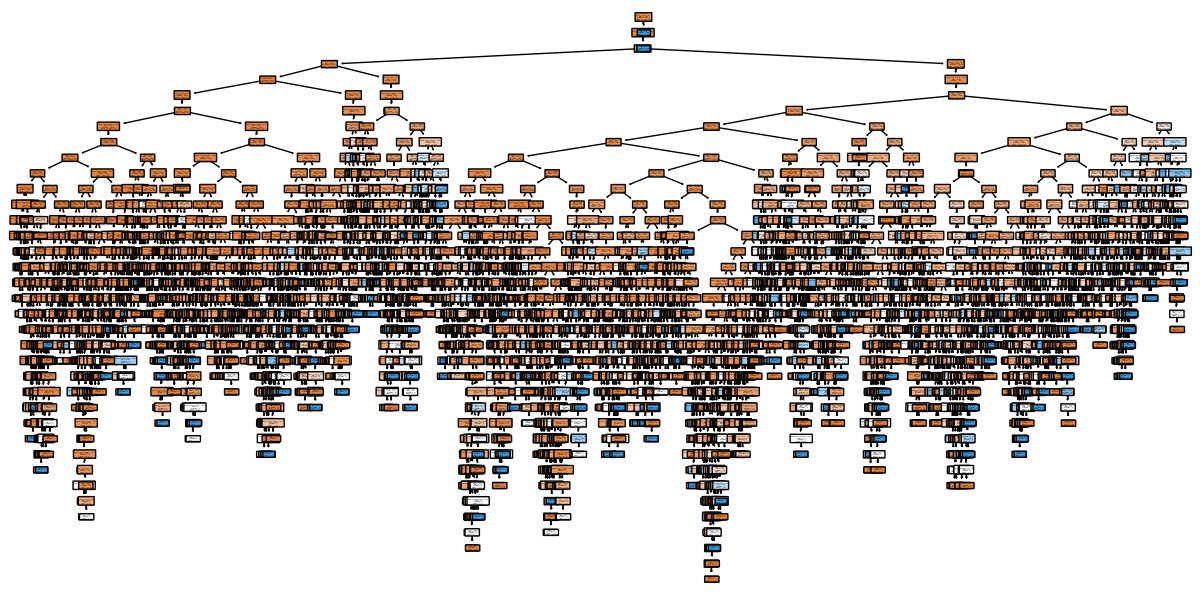

In [30]:
plt.figure(figsize=(15, 7.5))

plot_tree(
    clf_dt, 
    filled=True, 
    rounded=True, 
    class_names=['No Disease', 'Disease'], 
    feature_names=X.columns
)

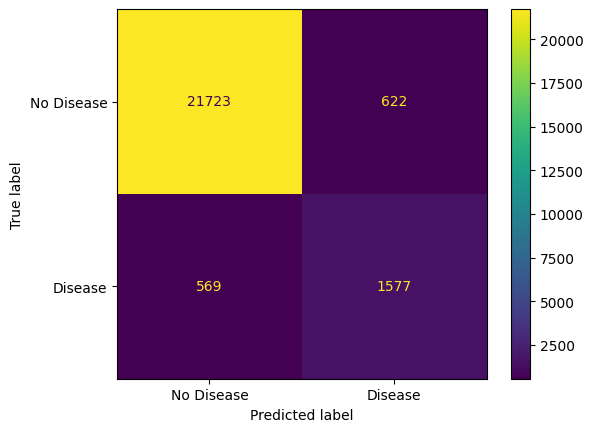

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot()
plt.show()

In [32]:
print(accuracy_score(y_test, predictions))

0.9513698909803602


In [33]:
paths = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = paths.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.32077522e-08, 5.83304654e-07, 7.95415438e-07, 8.64155043e-07,
       9.07362795e-07, 1.06615128e-06, 1.33497055e-06, 1.36104419e-06,
       1.36104419e-06, 1.51227133e-06, 1.52284665e-06, 1.67271188e-06,
       1.71043102e-06, 1.95907876e-06, 2.13230257e-06, 2.16529758e-06,
       2.25470060e-06, 2.26840699e-06, 2.26840699e-06, 2.26840699e-06,
       2.58249411e-06, 2.59246513e-06, 2.67853497e-06, 2.72208839e-06,
       2.72208839e-06, 2.85998029e-06, 2.93470475e-06, 3.02454265e-06,
       3.06161769e-06, 3.11095816e-06, 3.24058141e-06, 3.28726775e-06,
       3.31070733e-06, 3.35662926e-06, 3.48985691e-06, 3.62945118e-06,
       3.62945118e-06, 3.78067831e-06, 3.83884260e-06, 3.86242271e-06,
       3.93190545e-06, 4.00307116e-06, 4.08313258e-06, 4.08313258e-06,
       4.18782829e-06, 4.50754421e-06, 4.53681398e-06, 4.53681398e-06,
       4.53681398e-06, 4.53681398e-06, 4.53681398e-06, 4.53681398e-06,
      

In [34]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [35]:
training_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

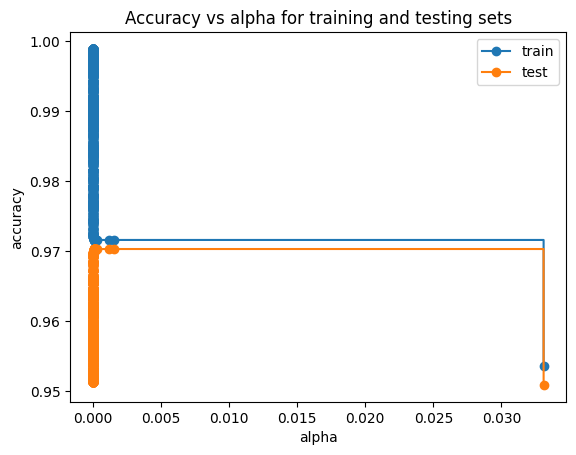

In [36]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, training_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)

df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

In [38]:
df

,tree,accuracy
0,0,0.970738
1,1,0.971487
2,2,0.972916
3,3,0.971145
4,4,0.971757


<Axes: xlabel='tree'>

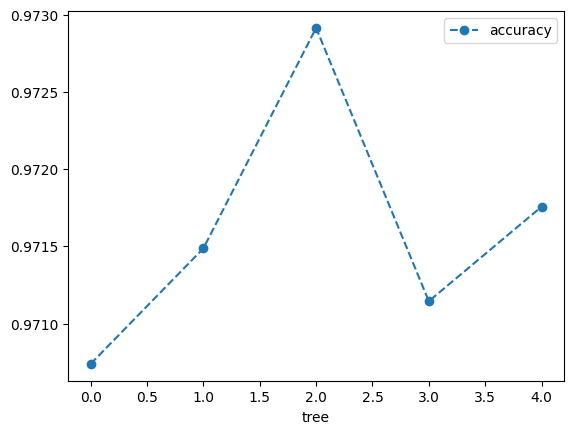

In [39]:
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [40]:
alpha_loop_scores = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

<Axes: xlabel='alpha'>

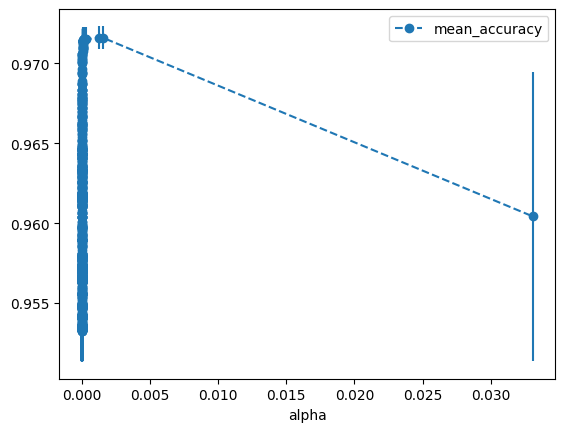

In [41]:
alpha_results = pd.DataFrame(alpha_loop_scores, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [42]:
alpha_results[(alpha_results['alpha'] > 0.00011) & (alpha_results['alpha'] < 0.0002)]

,alpha,mean_accuracy,std
976,0.000141,0.9715,0.000748
977,0.000159,0.9715,0.000748
978,0.000188,0.9715,0.000748
979,0.000192,0.9715,0.000748


In [43]:
optimal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.00011) & (alpha_results['alpha'] < 0.0002)]['alpha']

In [44]:
optimal_ccp_alpha = float(optimal_ccp_alpha.iloc[0])

In [45]:
optimal_ccp_alpha

0.00014096836356014726

In [46]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)

In [47]:
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00014096836356014726, random_state=42)

[Text(0.5, 0.9444444444444444, 'HbA1c_level <= 6.7\ngini = 0.158\nsamples = 73473\nvalue = [67119, 6354]\nclass = No Disease'),
 Text(0.43333333333333335, 0.8333333333333334, 'blood_glucose_level <= 210.0\ngini = 0.092\nsamples = 70522\nvalue = [67119, 3403]\nclass = No Disease'),
 Text(0.36666666666666664, 0.7222222222222222, 'age <= 53.5\ngini = 0.058\nsamples = 69205\nvalue = [67119, 2086]\nclass = No Disease'),
 Text(0.13333333333333333, 0.6111111111111112, 'bmi <= 38.445\ngini = 0.025\nsamples = 47075\nvalue = [46480, 595]\nclass = No Disease'),
 Text(0.06666666666666667, 0.5, 'gini = 0.019\nsamples = 44500\nvalue = [44074, 426]\nclass = No Disease'),
 Text(0.2, 0.5, 'HbA1c_level <= 5.35\ngini = 0.123\nsamples = 2575\nvalue = [2406, 169]\nclass = No Disease'),
 Text(0.13333333333333333, 0.3888888888888889, 'gini = 0.0\nsamples = 1058\nvalue = [1058, 0]\nclass = No Disease'),
 Text(0.26666666666666666, 0.3888888888888889, 'blood_glucose_level <= 113.0\ngini = 0.198\nsamples = 1517\

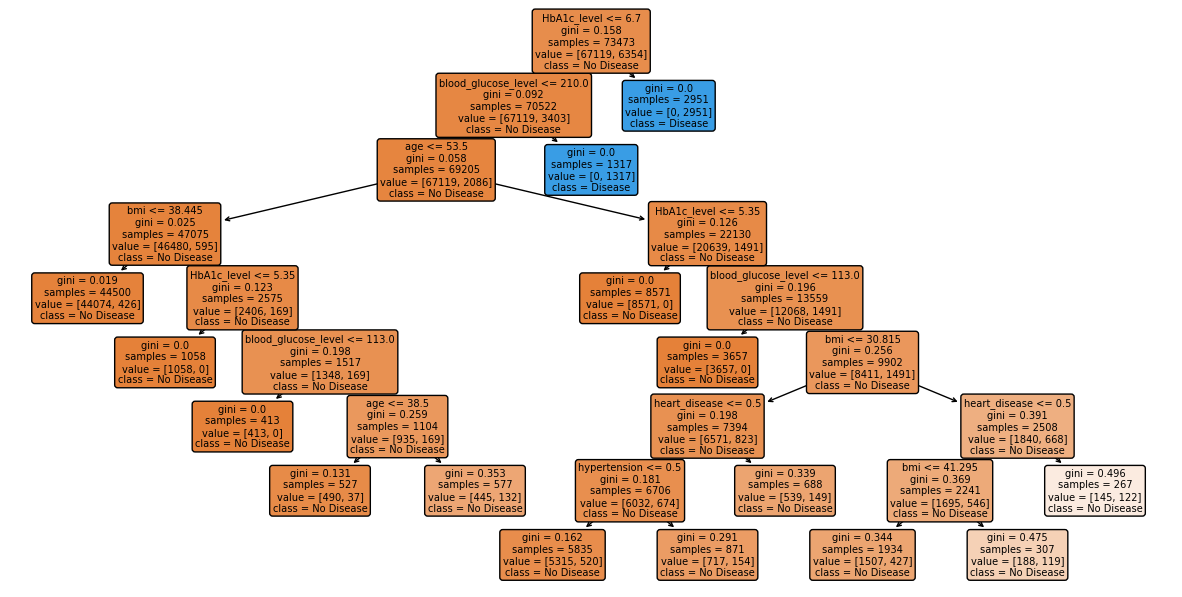

In [48]:
plt.figure(figsize=(15, 7.5))

plot_tree(
    clf_dt_pruned, 
    filled=True, 
    rounded=True, 
    class_names=['No Disease', 'Disease'], 
    feature_names=X.columns
)

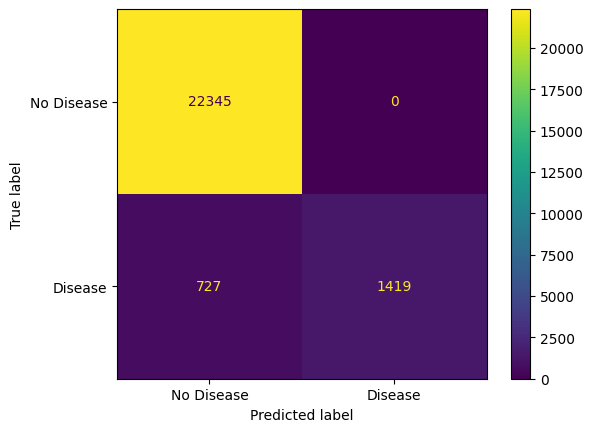

In [49]:
predictions = clf_dt_pruned.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot()
plt.show()

In [50]:
print(accuracy_score(y_test, predictions))

0.9703156261483811


Jag har gjort en prediction för att förutsäga om en person har diabetes eller inte och jag har använt decision tree modellen för att genomföra detta. Först tittade jag på datat och rensade, ibland fick jag backa och rensa igen för att jag missbedömt hur datat såg ut. Jag följde samma metod som vi hade gjort för hjärtsjukdomar vilket gav ett oerhört (i min begränsade erfarenhet) stort träd och mer fel. Jag gjorde då en Cost-Complexity Pruning algorithm från det vi lärde oss på lektionen med anpassat data för att passa mitt projekt. Detta slutade i att ett litet träd gav bättre träffsäkerhet än det stora trädet och kan anpassa sig bättre på nytt data. Den blev lite sämre på att förutse om man är sjuk men mycket bättre på att förutse om man inte är sjuk, då det svänger åt majoriteten (det finns fler som inte har diabetes än som har diabetes) så är det naturligt att den blir bättre på total träffsäkerhet men det kan finnas värde att höja ccp_alpha för att se om man kan ändra på vilka fel den får. 